## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0721 13:05:25.151493 12136 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0721 13:05:25.152493 12136 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0721 13:05:25.177494 12136 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 13:05:25.178495 12136 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 13:05:25.180496 12136 depr

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.8367 - acc: 0.3431 - val_loss: 1.6807 - val_acc: 0.3965
Epoch 2/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6085 - acc: 0.4287 - val_loss: 1.6718 - val_acc: 0.4109
Epoch 3/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5192 - acc: 0.4623 - val_loss: 1.5131 - val_acc: 0.4647
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4550 - acc: 0.4823 - val_loss: 1.4901 - val_acc: 0.4689
Epoch 5/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4078 - acc: 0.4998 - val_loss: 1.4522 - val_acc: 0.4832
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.3612 - acc: 0.5183 - val_loss: 1.4078 - val_acc: 0.5002
Epoch 7/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.3339 - acc: 0.5255 - val_loss: 1.4345 - 

Epoch 2/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.8040 - acc: 0.3633 - val_loss: 1.7525 - val_acc: 0.3846
Epoch 3/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.7240 - acc: 0.3950 - val_loss: 1.6935 - val_acc: 0.3991
Epoch 4/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.6655 - acc: 0.4159 - val_loss: 1.6388 - val_acc: 0.4259
Epoch 5/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6180 - acc: 0.4300 - val_loss: 1.5981 - val_acc: 0.4369
Epoch 6/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5771 - acc: 0.4456 - val_loss: 1.5652 - val_acc: 0.4487
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5429 - acc: 0.4547 - val_loss: 1.5371 - val_acc: 0.4586ss: 1.5457 - acc
Epoch 8/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.5123 - acc: 0.4681 - val_loss: 1.5167 - val_acc: 0.4649
Epoch 9/50
50000/5

50000/50000 [==============================] - 7s 133us/step - loss: 2.0194 - acc: 0.2955 - val_loss: 1.9913 - val_acc: 0.3007
Epoch 4/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.9656 - acc: 0.3126 - val_loss: 1.9463 - val_acc: 0.3151
Epoch 5/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.9257 - acc: 0.3291 - val_loss: 1.9118 - val_acc: 0.3315
Epoch 6/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.8946 - acc: 0.3398 - val_loss: 1.8839 - val_acc: 0.3415
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.8693 - acc: 0.3504 - val_loss: 1.8616 - val_acc: 0.3518
Epoch 8/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.8487 - acc: 0.3580 - val_loss: 1.8424 - val_acc: 0.3540: 1s - 
Epoch 9/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.8305 - acc: 0.3642 - val_loss: 1.8255 - val_acc: 0.3625
Epoch 10/50
50000/50000 [=============

50000/50000 [==============================] - 7s 133us/step - loss: 2.2262 - acc: 0.1942 - val_loss: 2.2168 - val_acc: 0.1995
Epoch 5/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.2079 - acc: 0.2072 - val_loss: 2.2001 - val_acc: 0.2124
Epoch 6/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.1919 - acc: 0.2146 - val_loss: 2.1853 - val_acc: 0.2230
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.1776 - acc: 0.2215 - val_loss: 2.1718 - val_acc: 0.2312
Epoch 8/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.1645 - acc: 0.2279 - val_loss: 2.1594 - val_acc: 0.2359
Epoch 9/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.1524 - acc: 0.2323 - val_loss: 2.1479 - val_acc: 0.2395
Epoch 10/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.1412 - acc: 0.2357 - val_loss: 2.1371 - val_acc: 0.2440
Epoch 11/50
50000/50000 [===================

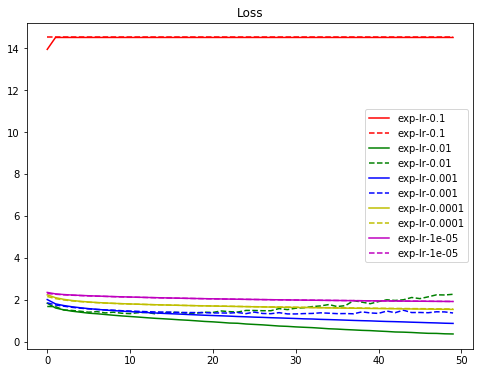

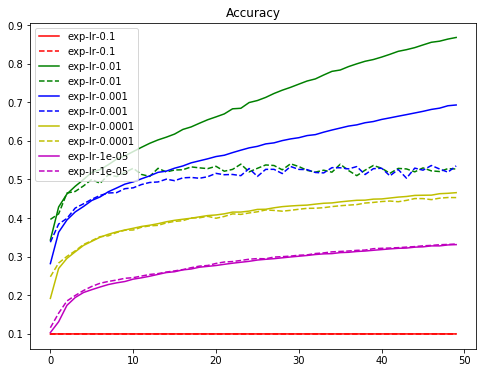

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現